# TP outil d’estimation de véhicules d’occasions

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

## Libraries import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from datetime import datetime
import seaborn as sns
#from sklearn.model_selection import train_test_split

## Dataframe import

In [3]:
victorPath = 'Data_cars.csv'
victorPath_ = 'prix-voiture.csv'
#myriamPath = 'D:\Data_cars.csv'
fpath = os.path.join(victorPath)
fpath_ = os.path.join(victorPath_)
print(fpath)
print(fpath_)
df = pd.read_csv(fpath)
df_ = pd.read_csv(fpath_)
df

Data_cars.csv
prix-voiture.csv


,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ..."
1,57526.0,BMW,X6,2015,39051.0 km,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M..."
2,80379.0,AUDI,RS6,2014,75381.0 km,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II..."
3,2830.0,FORD,KA,2007,92282.0 km,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis..."
4,12925.0,FIAT,TIPO,2018,10.0 km,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ..."
...,...,...,...,...,...,...,...,...,...
166690,20990.0,AUDI,A4,2014,65885.0 km,Diesel,automatique,06/07/2018 à 5h44,"modele: A4 (4E GENERATION) AVANT, version: IV ..."
166691,12056.0,VOLKSWAGEN,GOLF,2015,186000.0 km,Diesel,automatique,01/06/2018 à 15h22,"modele: GOLF 7, version: VII 2.0 TDI 150 BLUEM..."
166692,13423.0,FORD,FIESTA,2016,8784.0 km,Essence,mécanique,26/07/2018 à 18h57,"modele: FIESTA 5, version: V (2) 1.0 ECOBOOST ..."
166693,11918.0,SKODA,OCTAVIA,2013,111339.0 km,Diesel,automatique,30/05/2018 à 17h55,"modele: OCTAVIA 3, version: III 2.0 TDI 150 GR..."


In [4]:
df_

,Marque_Modele,VERSION,ENERGIE,Boite_de_vitesse,PUISS_FISCALE,DATE,MALUS,PRIX_Neuf
0,Renault Twizy,Electrique 45 BVA Life (2p.),Électrique,Automatique,1CV,04/2013,n.a.,7540
1,Dacia Logan,1.0 12V Sce 75 Access (4p.),Essence,Manuelle,4CV,06/2019,100,8150
2,Renault Twizy,Electrique 80 BVA Life (2p.),Électrique,Automatique,2CV,04/2013,n.a.,8240
3,Dacia Sandero,1.0i SCe 75 Access (5p.),Essence,Manuelle,4CV,06/2019,100,8290
4,Renault Twizy,Electrique 45 BVA Intens Blanc (2p.),Électrique,Automatique,1CV,07/2015,n.a.,8340
...,...,...,...,...,...,...,...,...
12062,Rolls-Royce Phantom Convertible,6.8i V12 460 BVA Drophead (Cabriolet),Essence,Automatique,49CV,06/2012,20000,457800
12063,Lamborghini Aventador Roadster,6.5 V12 770 BVA (Cabriolet),Essence,Automatique,79CV,11/2018,20000,464408
12064,Rolls-Royce Phantom,6.8i V12 460 BVA EWB (4p.),Essence,Automatique,46CV,06/2012,20000,484224
12065,Lamborghini Aventador Roadster,6.5 V12 770 BVA 63 Edition (Cabriolet),Essence,Automatique,79CV,03/2019,20000,523674


## Dataframe exploration

In [5]:
df.shape

(166695, 9)

In [6]:
df.columns.tolist()

['Price',
 'Make',
 'Model',
 'Model_year',
 'Mileage',
 'Fuel',
 'Gearbox',
 'Online',
 'Description']

In [7]:
df.head(10)

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ..."
1,57526.0,BMW,X6,2015,39051.0 km,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M..."
2,80379.0,AUDI,RS6,2014,75381.0 km,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II..."
3,2830.0,FORD,KA,2007,92282.0 km,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis..."
4,12925.0,FIAT,TIPO,2018,10.0 km,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ..."
5,27956.0,BMW,X3,2012,95623.0 km,Diesel,automatique,14/03/2018 à 4h24,"modele: X3 F25, version: (F25) XDRIVE35D 313 S..."
6,16888.0,AUDI,A3,2013,49018.0 km,Diesel,mécanique,16/04/2018 à 21h35,"modele: A3 (2E GENERATION) SPORTBACK, version:..."
7,18188.0,RENAULT,MEGANE,2017,9795.0 km,Diesel,automatique,29/04/2018 à 12h44,"modele: MEGANE 4 ESTATE, version: IV ESTATE 1...."
8,10594.0,FORD,C-MAX,2012,126670.0 km,Diesel,mécanique,22/06/2018 à 5h11,"modele: C-MAX 2, version: II 1.6 TDCI 115 FAP ..."
9,69131.0,MERCEDES,CLASSE C,2015,39439.0 km,Essence,automatique,08/03/2018 à 17h35,"modele: CLASSE C 4 AMG, version: (W205) 63 AMG..."


In [8]:
print (df.dtypes)

Price          float64
Make            object
Model           object
Model_year       int64
Mileage         object
Fuel            object
Gearbox         object
Online          object
Description     object
dtype: object


In [9]:
df['Mileage'] = df['Mileage'].map(lambda x : int(float(x[:-3])))
print (df.dtypes)

Price          float64
Make            object
Model           object
Model_year       int64
Mileage          int64
Fuel            object
Gearbox         object
Online          object
Description     object
dtype: object


In [10]:
df.at[2,'Description']

"modele: RS6 (3E GENERATION) AVANT, version: III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC, puissance_fiscale: 47, portes: 5.0, options: banquette arrière 3 places;écran tactile;témoin de bouclage des ceintures av;palettes au volant;volant cuir;régulateur limiteur de vitesse;commande climatisation ar;pack dynamique;cache bagages;sorties d'échappement chromées;affichage tête haute;rétroviseurs électriques;airbag frontal;banquette 1/3 - 2/3;vision périphérique (360°);commandes vocales;vitres teintées;GPS;services connectés;prise audio USB;stations de webradio;poignées ton carrosserie;pare-brise thermique;système d'éclairage intelligent;régulateur de vitesse;siège conducteur à mémoire;inserts de porte carbone;rétroviseurs extérieurs à mémoire;carte main libre;jantes alu;siège passager à réglages électriques;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;colonne de direction électr. à mémoire;applications bois noir avec inserts alu;accoudoir central arrière;climatisa

In [11]:
df.describe()

,Price,Model_year,Mileage
count,1.666950e+05,166695.000000,1.666950e+05
mean,1.933369e+04,2014.605387,4.689404e+04
std,1.642034e+04,8.304980,4.821007e+04
min,1.000000e+00,1900.000000,1.000000e+00
25%,1.128000e+04,2013.000000,9.169500e+03
50%,1.577400e+04,2016.000000,3.048500e+04
75%,2.270750e+04,2017.000000,7.335700e+04
max,1.486500e+06,5018.000000,1.418551e+06


In [12]:
df.isna().sum()

Price          0
Make           0
Model          0
Model_year     0
Mileage        0
Fuel           0
Gearbox        0
Online         0
Description    0
dtype: int64

Text(0.5, 1.0, 'Pice in terms of Mileage')

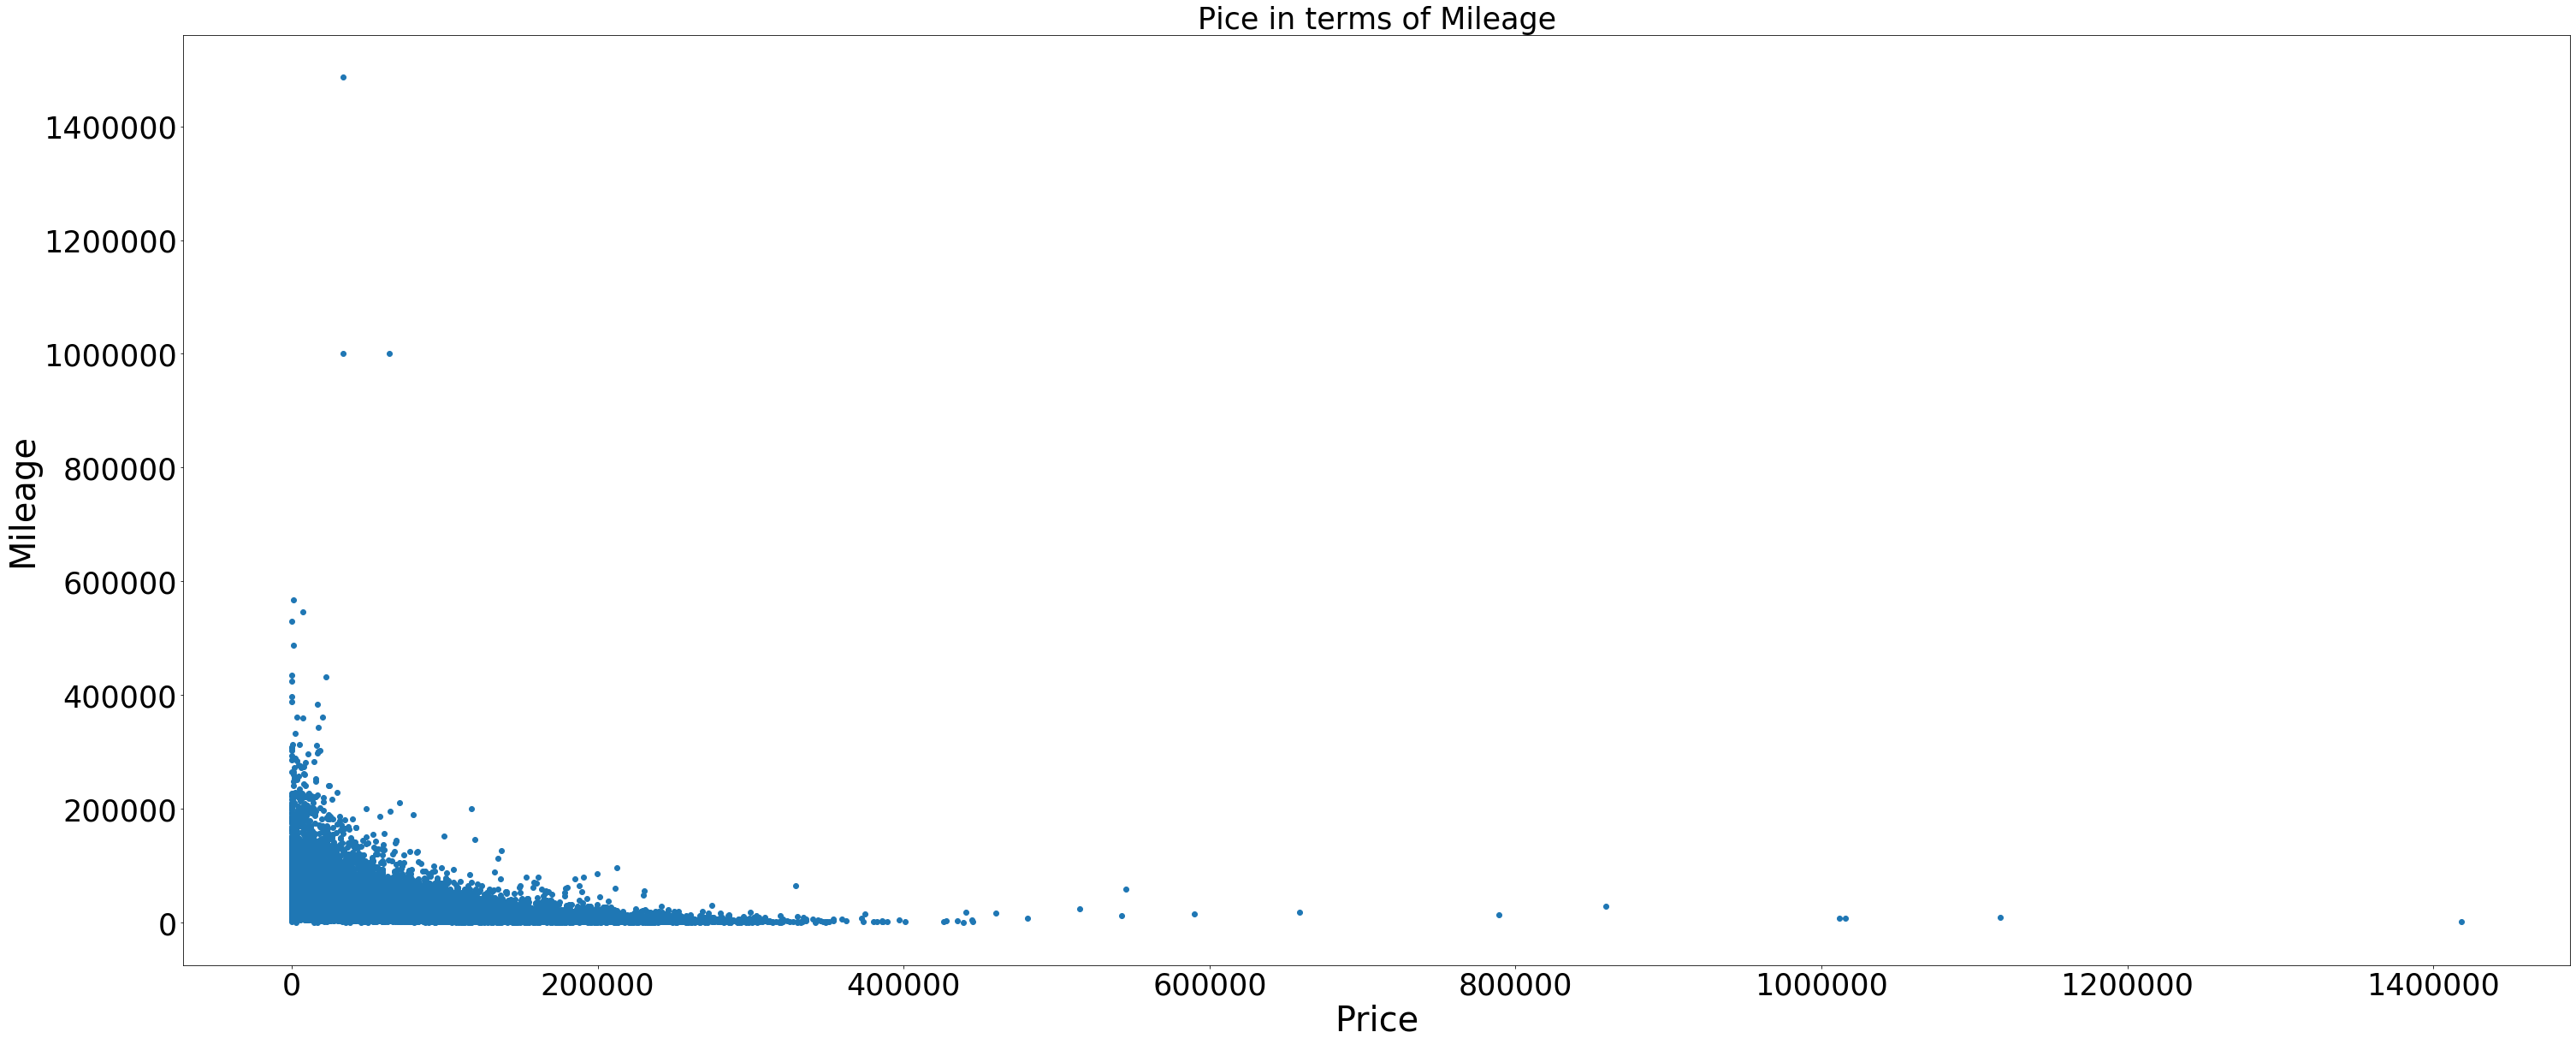

In [13]:
plt.figure(figsize=(50,20))
plt.scatter(df['Mileage'],df['Price'])
plt.xlabel("Price",size=40)
plt.xticks(size=35)
plt.ylabel("Mileage",size=40)
plt.yticks(size=35)
plt.title('Pice in terms of Mileage',size=35)

Text(0, 0.5, 'Number of cars')

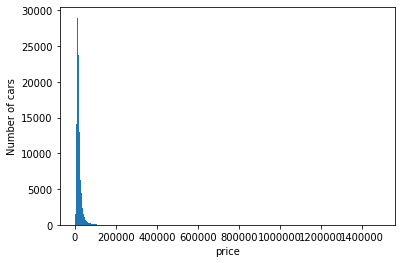

In [14]:
plt.hist(df['Price'],bins=500)
plt.xlabel("price",size=10)
plt.ylabel("Number of cars",size=10)

Text(0, 0.5, 'Number of cars')

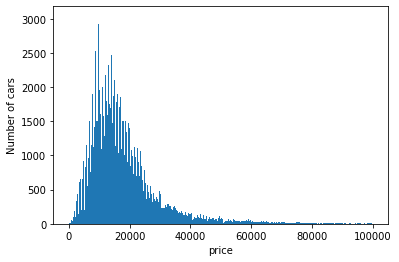

In [15]:
df2 = df.loc[df['Price'] < 100000]
plt.hist(df2['Price'],bins=500)
plt.xlabel("price",size=10)
plt.ylabel("Number of cars",size=10)

In [16]:
df['Make']=df['Make'].map(lambda x: x.strip())
df.Make.unique()

array(['PEUGEOT', 'BMW', 'AUDI', 'FORD', 'FIAT', 'RENAULT', 'MERCEDES',
       'SEAT', 'MINI', 'HYUNDAI', 'DACIA', 'VOLKSWAGEN', 'CITROEN',
       'TOYOTA', 'JAGUAR', 'OPEL', 'PORSCHE', 'NISSAN', 'LAND ROVER',
       'MAZDA', 'VOLVO', 'SKODA', 'DS', 'SSANGYONG', 'SUZUKI', 'HONDA',
       'LEXUS', 'INFINITI', 'JEEP', 'KIA', 'DODGE', 'ASTON MARTIN',
       'LANCIA', 'LOTUS', 'CHEVROLET', 'SMART', 'ALFA ROMEO', 'BUGATTI',
       'MITSUBISHI', 'MERCEDES-AMG', 'AIXAM', 'FERRARI', 'MG',
       'LAMBORGHINI', 'MASERATI', 'SUBARU', 'MORGAN', 'CHRYSLER',
       'ROLLS ROYCE', 'TESLA', 'ABARTH', 'LADA', 'BMW-ALPINA', 'SAAB',
       'PACKARD', 'CADILLAC', 'ROVER', 'SHELBY', 'MICROCAR', 'ALPINA',
       'BENTLEY', 'DAIHATSU', 'HUMMER', 'TRIUMPH', 'LIGIER', 'DAEWOO',
       'AUSTIN HEALEY', 'JIAYUAN', 'MCLAREN', 'AUSTIN', 'DANGEL',
       'CATERHAM', 'CHATENET', 'INTERMECCANICA', 'AC', 'AUTOBIANCHI',
       'SUNBEAM', 'MIA ELECTRIC', 'BOLLORE', 'MPM MOTORS', 'INNOCENTI',
       'MATRA', 'DONKERVOOR

In [17]:
#pd.set_option('display.max_rows', None)
df2=df.Make.value_counts()#normalize=True
df2=pd.Series.to_frame(df2)
df2.reset_index(inplace=True)
df2.columns=["Maker", "nbrCar"]
df2

,Maker,nbrCar
0,RENAULT,30690
1,PEUGEOT,26119
2,CITROEN,17609
3,VOLKSWAGEN,11241
4,BMW,9424
...,...,...
87,BELLIER,1
88,AUTOBIANCHI,1
89,BURBY S,1
90,AC,1


Text(0.5, 1.0, 'Number of cars per Mark')

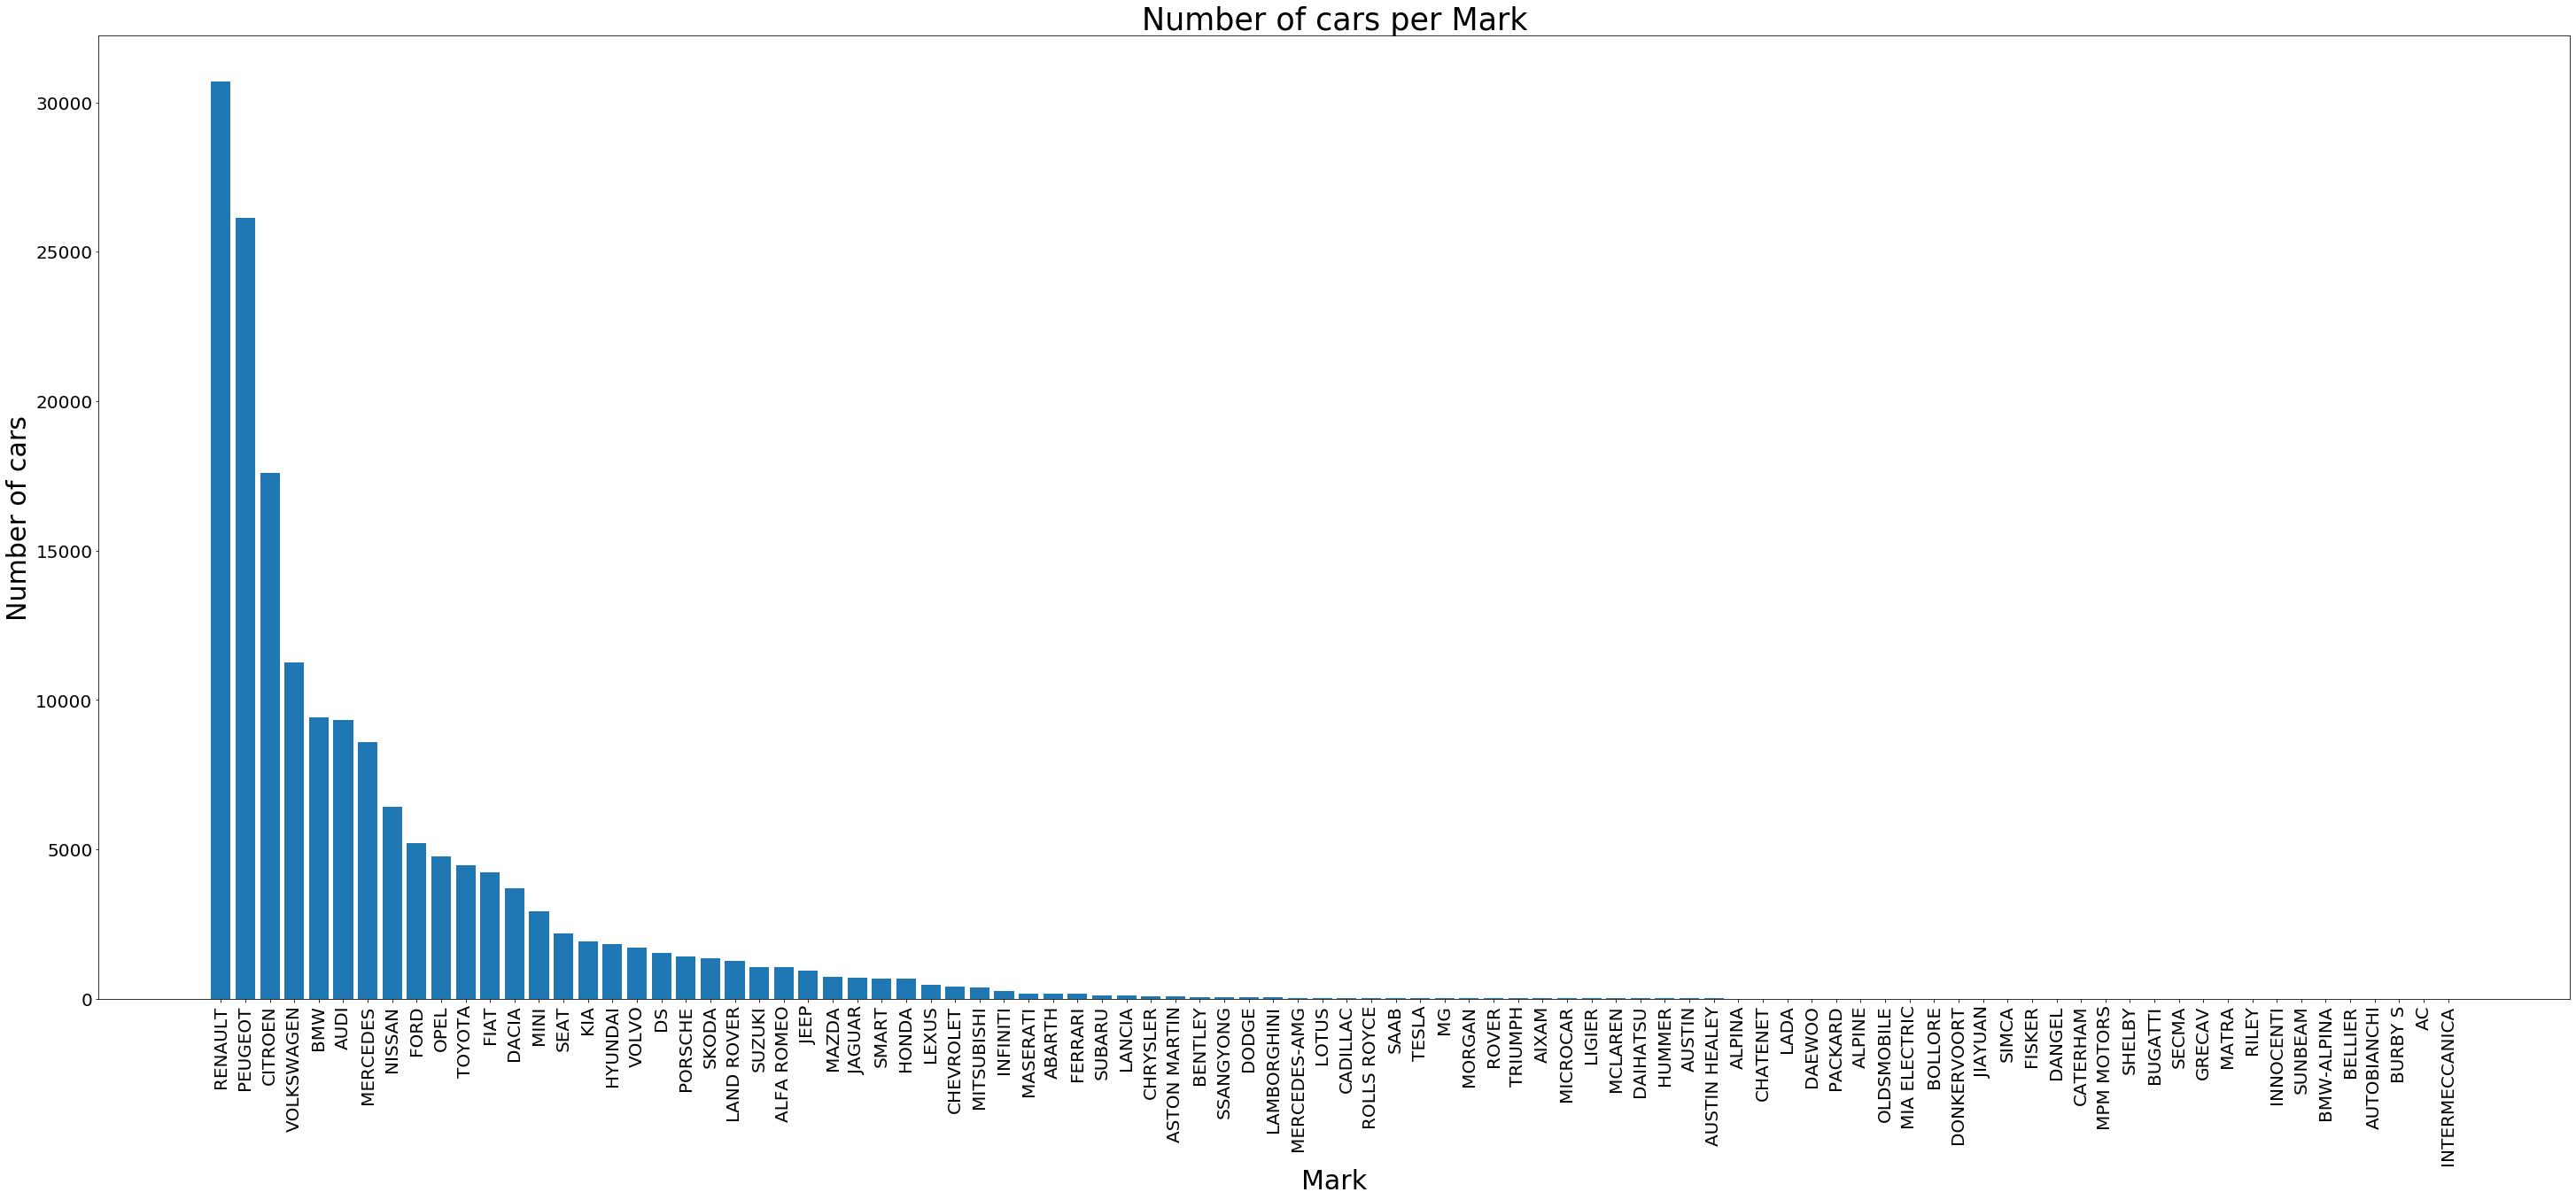

In [18]:
plt.figure(figsize=(50,20))
plt.bar("Maker", "nbrCar",data = df2)
plt.xlabel("Mark",size=30)
plt.xticks(rotation=90,size=20)
plt.ylabel("Number of cars",size=30)
plt.yticks(size=20)
plt.title('Number of cars per Mark',size=35)

Text(0, 0.5, '€')

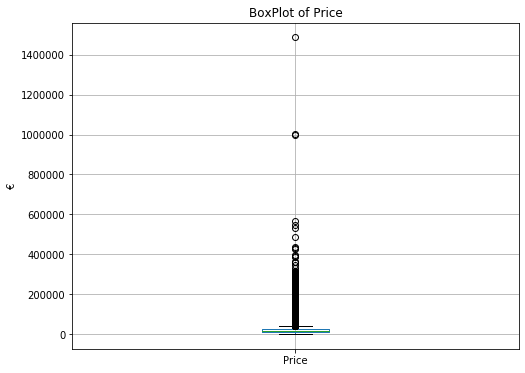

In [19]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
df.boxplot(column='Price', ax=ax)
# frame['ArrDelay'].plot.box(ax=ax) # Alternative
ax.set_title('BoxPlot of Price')
ax.set_ylabel('€')

In [20]:
pd.options.display.max_rows = 15
df.sort_values(by=['Model_year'])
df.loc[df['Model_year'] > 2020]

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
17541,13159.0,FIAT,500,5018,2973,Diesel,mécanique,02/05/2018 à 6h54,"modele: , version: LOUNGE 1.2 69, puissance_fi..."


In [21]:
df=df.loc[df['Model_year'] < 2020]

In [22]:
df=df.loc[df['Model_year'] > 1945]

In [23]:
df.at[56,'Description']

"modele: KADJAR, version: 1.6 DCI 130 ENERGY INTENS, puissance_fiscale: 7, portes: 5.0, options: écran tactile;volant cuir;régulateur limiteur de vitesse;système de récupération d'énergie au freinage;prises audio auxiliaires;cache bagages;direction assistée;blanc nacré;rétroviseurs électriques;airbag frontal;banquette 1/3 - 2/3;vitres ar. surteintées;appui-tête conducteur réglable hauteur;commandes vocales;mixte simili cuir/tissu noir titane;vitres teintées;bacs de portes arrière;GPS;services connectés;prise audio USB;poignées ton carrosserie;régulateur de vitesse;dispositif freinage automatique;carte main libre;jantes alu;boucliers av et ar couleur caisse;phares av. de jour;phares av. de jour à LED;airbags rideaux;projecteurs antibrouillard;blanc glacier;climatisation automatique multi zone;vitres électriques;feux de freinage d'urgence;caméra de recul;banquette rabattable;appui-tête passager réglable en hauteur;filtre à pollen;interface media;rétroviseurs rabattables électriquement;po

In [24]:
df['Fiscal_Horsepower'] = df['Description'].map(lambda x : int(re.search(r'puissance_fiscale: (.*?), ',x).group(1)))
df['Fiscal_Horsepower']

0          4
1         16
2         47
3          5
4          5
          ..
166690    10
166691     8
166692     5
166693     8
166694    10
Name: Fiscal_Horsepower, Length: 166682, dtype: int64

In [25]:
df['Fiscal_Horsepower'].unique()

array([   4,   16,   47,    5,   20,    7,    6,   40,    8,   11,   32,
         15,   12,   10,    9,   17,    0,   13,   14,   24,    3,   18,
         35,    1,   29,   34,  118,   52,   19,   22,   25,   28,   23,
         41,   26,   27,   21,   37,   61,   31,   50,   48,   46,   30,
         49,   42,    2,   38,   33,   43,   44,   54,   58,   63,   56,
         57,   45,   39,   51,   36,  131,   72,   59,   70,   64,   81,
        205, 2013,   62,   53,   68,   66,   73,   75,   69,  204,  202,
        110,   65,  150,  105,  109])

In [26]:
df['Version'] = df['Description'].map(lambda x : re.search(r'version:(.*?), ',x).group(1))
df['Version']

0                              1.6 HDI FAP 92CH BUSINESS 5P
1                          (F16) XDRIVE30D 258 M SPORT BVA8
2                  III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC
3                                                1.3 70 FUN
4                                          II SW 1.4 95 POP
                                ...                        
166690     IV (2) AVANT 2.0 TDI 177 BUSINESS LINE QUATTR...
166691     VII 2.0 TDI 150 BLUEMOTION TECHNOLOGY CONFORT...
166692                V (2) 1.0 ECOBOOST 100 S&S EDITION 5P
166693         III 2.0 TDI 150 GREEN TEC BUSINESS PLUS DSG6
166694            II 2.0 DCI 175 ENERGY INTENS 4X2 X-TRONIC
Name: Version, Length: 166682, dtype: object

In [27]:
df['doors'] = df['Description'].map(lambda x : re.search(r'portes:(.*?), ',x).group(1))
df['doors'] = df['doors'].map(lambda x: x.strip())
df['doors'] = df['doors'].map(lambda x: 7  if(x=='') else int(x[:-2]))
df['doors'].unique()

array([5, 3, 4, 2, 7, 0, 6])

In [28]:
df['Options'] = df['Description'].map(lambda x : re.search(r'options:(.*?), couleur:', x).group(1).split(';'))
df['Options_Count'] = df['Description'].map(lambda x : re.search(r'options:(.*?), couleur:', x).group(1).count(';'))
df['Couleurs'] = df['Description'].map(lambda x : re.split(r'couleur: ', x)[-1])
df['Couleurs'].unique()

array(['BLANC BANQUISE', 'Carbonschwarz metallise',
       'NOIR PANTHERE CRISTAL', ...,
       'beige opaque (verni sans reflet)   ', 'NOIR OBSIDIEN NACRE',
       'Gris poivre metallis'], dtype=object)

In [29]:
df['Age']  = df['Online'].map(lambda x : datetime.strptime(x, '%d/%m/%Y à %Hh%M'))
df['Age'] = df.apply(lambda row: row['Age'].year - int(row['Model_year']), axis=1)

In [30]:
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Fiscal_Horsepower,Version,doors,Options,Options_Count,Couleurs,Age
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",4,1.6 HDI FAP 92CH BUSINESS 5P,5,"[ banquette arrière 3 places, volant cuir, cac...",53,BLANC BANQUISE,4
1,57526.0,BMW,X6,2015,39051,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",16,(F16) XDRIVE30D 258 M SPORT BVA8,5,[ triangle de presignalisation et trousse de p...,40,Carbonschwarz metallise,3
2,80379.0,AUDI,RS6,2014,75381,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",47,III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC,5,"[ banquette arrière 3 places, écran tactile, t...",139,NOIR PANTHERE CRISTAL,4
3,2830.0,FORD,KA,2007,92282,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis...",5,1.3 70 FUN,3,"[ direction assistée, jantes alu, rétroviseurs...",7,JAUNE,11
4,12925.0,FIAT,TIPO,2018,10,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ...",5,II SW 1.4 95 POP,5,"[ Volant alu & cuir, Bluetooth inclut musique ...",23,blanc verni,0


In [31]:
df['Fuel'].unique()

array(['Diesel', 'Essence', 'Hybride essence électrique', 'Electrique',
       'Bicarburation essence GNV', 'Hybride diesel électrique',
       'Bicarburation essence GPL', 'Bicarburation essence bioéthanol'],
      dtype=object)

In [32]:
df = df.join(pd.get_dummies(df['Fuel']))
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Fiscal_Horsepower,...,Couleurs,Age,Bicarburation essence GNV,Bicarburation essence GPL,Bicarburation essence bioéthanol,Diesel,Electrique,Essence,Hybride diesel électrique,Hybride essence électrique
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",4,...,BLANC BANQUISE,4,0,0,0,1,0,0,0,0
1,57526.0,BMW,X6,2015,39051,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",16,...,Carbonschwarz metallise,3,0,0,0,1,0,0,0,0
2,80379.0,AUDI,RS6,2014,75381,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",47,...,NOIR PANTHERE CRISTAL,4,0,0,0,0,0,1,0,0
3,2830.0,FORD,KA,2007,92282,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis...",5,...,JAUNE,11,0,0,0,0,0,1,0,0
4,12925.0,FIAT,TIPO,2018,10,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ...",5,...,blanc verni,0,0,0,0,0,0,1,0,0


In [33]:
pd.set_option('display.max_columns', None)
df = df.join(pd.get_dummies(df['Gearbox']))
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Fiscal_Horsepower,Version,doors,Options,Options_Count,Couleurs,Age,Bicarburation essence GNV,Bicarburation essence GPL,Bicarburation essence bioéthanol,Diesel,Electrique,Essence,Hybride diesel électrique,Hybride essence électrique,automatique,mécanique
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",4,1.6 HDI FAP 92CH BUSINESS 5P,5,"[ banquette arrière 3 places, volant cuir, cac...",53,BLANC BANQUISE,4,0,0,0,1,0,0,0,0,0,1
1,57526.0,BMW,X6,2015,39051,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",16,(F16) XDRIVE30D 258 M SPORT BVA8,5,[ triangle de presignalisation et trousse de p...,40,Carbonschwarz metallise,3,0,0,0,1,0,0,0,0,1,0
2,80379.0,AUDI,RS6,2014,75381,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",47,III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC,5,"[ banquette arrière 3 places, écran tactile, t...",139,NOIR PANTHERE CRISTAL,4,0,0,0,0,0,1,0,0,1,0
3,2830.0,FORD,KA,2007,92282,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis...",5,1.3 70 FUN,3,"[ direction assistée, jantes alu, rétroviseurs...",7,JAUNE,11,0,0,0,0,0,1,0,0,0,1
4,12925.0,FIAT,TIPO,2018,10,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ...",5,II SW 1.4 95 POP,5,"[ Volant alu & cuir, Bluetooth inclut musique ...",23,blanc verni,0,0,0,0,0,0,1,0,0,0,1


In [34]:
pd.set_option('display.max_rows', None)
print (df.dtypes)
pd.set_option('display.max_rows', 15)

Price                               float64
Make                                 object
Model                                object
Model_year                            int64
Mileage                               int64
Fuel                                 object
Gearbox                              object
Online                               object
Description                          object
Fiscal_Horsepower                     int64
Version                              object
doors                                 int64
Options                              object
Options_Count                         int64
Couleurs                             object
Age                                   int64
Bicarburation essence GNV             uint8
Bicarburation essence GPL             uint8
Bicarburation essence bioéthanol      uint8
Diesel                                uint8
Electrique                            uint8
Essence                               uint8
Hybride diesel électrique       

In [35]:
def cylindre(string):
    cyl = re.search(r'(\d*\.\d*)', string)
    if(cyl != None):
        if cyl.group(1) != '.':
            val = round(float(cyl.group(1)), 1)
            return val
        else:
            return 0
    else:
        return 0
    
df['Cylindre'] = df['Description'].map(lambda x :  cylindre(re.search(r'version: (.*?),', x).group(1)))

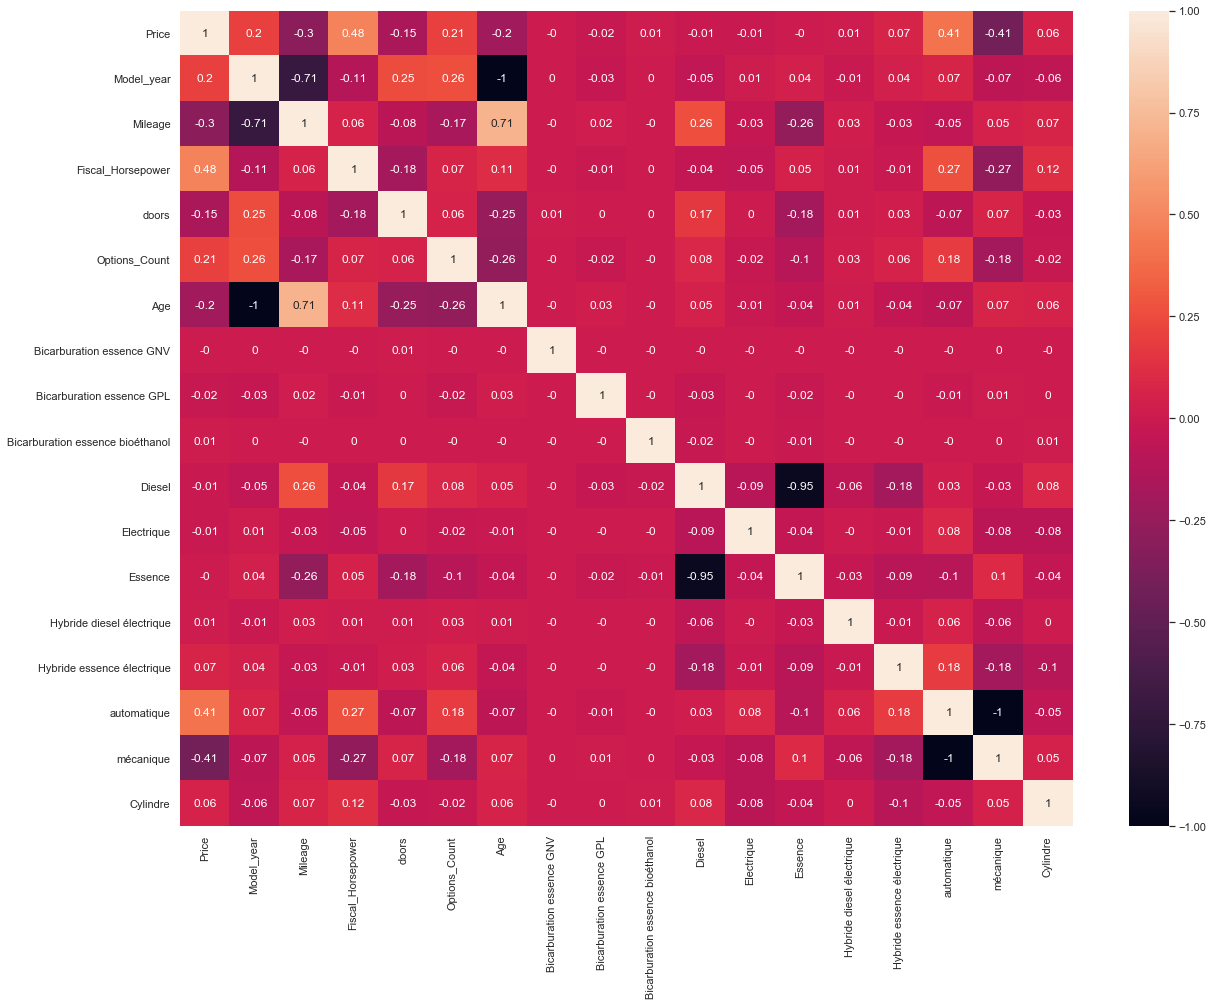

In [36]:
sns.set()
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr().round(2), annot=True)

In [37]:
df = df.join(pd.get_dummies(df['Cylindre']))

In [38]:
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Fiscal_Horsepower,Version,doors,Options,Options_Count,Couleurs,Age,Bicarburation essence GNV,Bicarburation essence GPL,Bicarburation essence bioéthanol,Diesel,Electrique,Essence,Hybride diesel électrique,Hybride essence électrique,automatique,mécanique,Cylindre,0.0,0.1,0.2,0.6,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,5.0,5.2,5.3,5.5,5.7,5.9,6.0,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.7,8.0,8.6,12.2,13.8,16.4,16.6,19.3,35.5,39.0,42.9,47.3,52.7,58.8,69.5,71.0,73.8,74.4,76.5,87.5,159.2
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",4,1.6 HDI FAP 92CH BUSINESS 5P,5,"[ banquette arrière 3 places, volant cuir, cac...",53,BLANC BANQUISE,4,0,0,0,1,0,0,0,0,0,1,1.6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,57526.0,BMW,X6,2015,39051,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",16,(F16) XDRIVE30D 258 M SPORT BVA8,5,[ triangle de presignalisation et trousse de p...,40,Carbonschwarz metallise,3,0,0,0,1,0,0,0,0,1,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,80379.0,AUDI,RS6,2014,75381,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",47,III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC,5,"[ banquette arrière 3 places, écran tactile, t...",139,NOIR PANTHERE CRISTAL,4,0,0,0,0,0,1,0,0,1,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2830.0,FORD,KA,2007,92282,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis...",5,1.3 70 FUN,3,"[ direction assistée, jantes alu, rétroviseurs...",7,JAUNE,11,0,0,0,0,0,1,0,0,0,1,1.3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12925.0,FIAT,TIPO,2018,10,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ...",5,II SW 1.4 95 POP,5,"[ Volant alu & cuir, Bluetooth inclut musique ...",23,blanc verni,0,0,0,0,0,0,1,0,0,0,1,1.4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
df['Cylindre'].unique()

array([1.600e+00, 0.000e+00, 4.000e+00, 1.300e+00, 1.400e+00, 2.000e+00,
       1.500e+00, 1.800e+00, 1.100e+00, 1.200e+00, 1.000e+00, 4.200e+00,
       3.000e+00, 9.000e-01, 1.700e+00, 2.200e+00, 1.900e+00, 3.400e+00,
       4.500e+00, 3.500e+00, 6.200e+00, 2.700e+00, 8.000e-01, 1.640e+01,
       4.400e+00, 2.500e+00, 2.400e+00, 3.200e+00, 3.600e+00, 3.800e+00,
       3.700e+00, 4.100e+00, 5.300e+00, 5.000e+00, 2.900e+00, 6.800e+00,
       4.700e+00, 4.800e+00, 2.300e+00, 2.800e+00, 5.700e+00, 5.200e+00,
       6.600e+00, 3.900e+00, 6.000e+00, 2.100e+00, 4.300e+00, 5.500e+00,
       5.900e+00, 3.550e+01, 6.500e+00, 8.000e+00, 5.270e+01, 6.300e+00,
       7.650e+01, 4.600e+00, 6.400e+00, 7.380e+01, 6.700e+00, 7.440e+01,
       3.300e+00, 8.750e+01, 1.000e-01, 3.900e+01, 1.930e+01, 1.220e+01,
       4.730e+01, 6.900e+00, 1.380e+01, 1.660e+01, 2.600e+00, 7.700e+00,
       6.000e-01, 2.000e-01, 1.592e+02, 3.100e+00, 8.600e+00, 7.100e+01,
       4.290e+01, 6.950e+01, 5.880e+01])

Text(0.5, 0, 'Cylindrée')

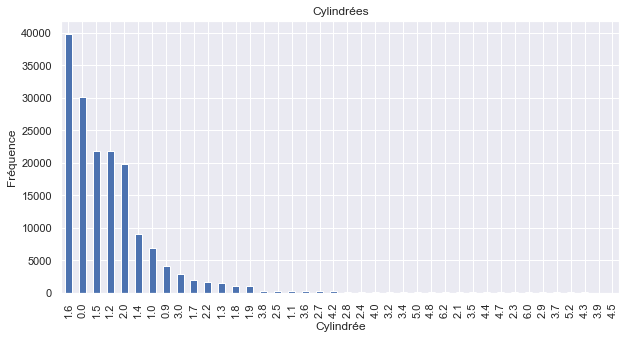

In [40]:
df['Cylindre'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Cylindrées')
plt.ylabel('Fréquence')
plt.xlabel('Cylindrée')

In [41]:
df = df.join(pd.get_dummies(df['Make']))
list(df)

['Price',
 'Make',
 'Model',
 'Model_year',
 'Mileage',
 'Fuel',
 'Gearbox',
 'Online',
 'Description',
 'Fiscal_Horsepower',
 'Version',
 'doors',
 'Options',
 'Options_Count',
 'Couleurs',
 'Age',
 'Bicarburation essence GNV',
 'Bicarburation essence GPL',
 'Bicarburation essence bioéthanol',
 'Diesel',
 'Electrique',
 'Essence',
 'Hybride diesel électrique',
 'Hybride essence électrique',
 'automatique',
 'mécanique',
 'Cylindre',
 0.0,
 0.1,
 0.2,
 0.6,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 5.0,
 5.2,
 5.3,
 5.5,
 5.7,
 5.9,
 6.0,
 6.2,
 6.3,
 6.4,
 6.5,
 6.6,
 6.7,
 6.8,
 6.9,
 7.7,
 8.0,
 8.6,
 12.2,
 13.8,
 16.4,
 16.6,
 19.3,
 35.5,
 39.0,
 42.9,
 47.3,
 52.7,
 58.8,
 69.5,
 71.0,
 73.8,
 74.4,
 76.5,
 87.5,
 159.2,
 'ABARTH',
 'AC',
 'AIXAM',
 'ALFA ROMEO',
 'ALPINA',
 'A

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [43]:
pd.set_option('display.max_rows', None)
print (df.dtypes)
pd.set_option('display.max_rows', 15)

Price                               float64
Make                                 object
Model                                object
Model_year                            int64
Mileage                               int64
Fuel                                 object
Gearbox                              object
Online                               object
Description                          object
Fiscal_Horsepower                     int64
Version                              object
doors                                 int64
Options                              object
Options_Count                         int64
Couleurs                             object
Age                                   int64
Bicarburation essence GNV             uint8
Bicarburation essence GPL             uint8
Bicarburation essence bioéthanol      uint8
Diesel                                uint8
Electrique                            uint8
Essence                               uint8
Hybride diesel électrique       

In [44]:
pd.set_option('display.max_columns', None)

In [45]:
df.columns

Index([            'Price',              'Make',             'Model',
              'Model_year',           'Mileage',              'Fuel',
                 'Gearbox',            'Online',       'Description',
       'Fiscal_Horsepower',
       ...
                   'SMART',         'SSANGYONG',            'SUBARU',
                 'SUNBEAM',            'SUZUKI',             'TESLA',
                  'TOYOTA',           'TRIUMPH',        'VOLKSWAGEN',
                   'VOLVO'],
      dtype='object', length=200)

In [46]:
input_columns=['Model_year','Age','Mileage','Fiscal_Horsepower','Cylindre', 'Options_Count','doors', 'Bicarburation essence GNV','Bicarburation essence GPL','Bicarburation essence bioéthanol','Diesel', 'Electrique','Hybride diesel électrique','Hybride essence électrique','automatique','mécanique']

In [47]:
X = df[input_columns]
#independent variables
y = df['Price'] #dependent (target) variable

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2 )

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133345, 16), (33337, 16), (133345,), (33337,))

In [50]:
linreg = LinearRegression()
linreg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
linreg.score(X_train, y_train)

0.4136054977686736

In [52]:
linreg.score(X_test, y_test)

0.5209230995576293

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
regr = RandomForestRegressor(max_depth=20, random_state=0, n_estimators=10)

regr.fit(X_train, y_train)
print('R-squared score (training): {:.3f}'
     .format(regr.score(X_train, y_train)))

print('R-squared score (training): {:.3f}'
     .format(regr.score(X_test, y_test)))

R-squared score (training): 0.954
R-squared score (training): 0.882


In [55]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [56]:
score = mean_absolute_percentage_error(0.954,0.874)
print("The percentage : {} %".format(score))

The percentage : 8.385744234800836 %


# Fuzzy Matching

In [57]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [58]:
df_

,Marque_Modele,VERSION,ENERGIE,Boite_de_vitesse,PUISS_FISCALE,DATE,MALUS,PRIX_Neuf
0,Renault Twizy,Electrique 45 BVA Life (2p.),Électrique,Automatique,1CV,04/2013,n.a.,7540
1,Dacia Logan,1.0 12V Sce 75 Access (4p.),Essence,Manuelle,4CV,06/2019,100,8150
2,Renault Twizy,Electrique 80 BVA Life (2p.),Électrique,Automatique,2CV,04/2013,n.a.,8240
3,Dacia Sandero,1.0i SCe 75 Access (5p.),Essence,Manuelle,4CV,06/2019,100,8290
4,Renault Twizy,Electrique 45 BVA Intens Blanc (2p.),Électrique,Automatique,1CV,07/2015,n.a.,8340
...,...,...,...,...,...,...,...,...
12062,Rolls-Royce Phantom Convertible,6.8i V12 460 BVA Drophead (Cabriolet),Essence,Automatique,49CV,06/2012,20000,457800
12063,Lamborghini Aventador Roadster,6.5 V12 770 BVA (Cabriolet),Essence,Automatique,79CV,11/2018,20000,464408
12064,Rolls-Royce Phantom,6.8i V12 460 BVA EWB (4p.),Essence,Automatique,46CV,06/2012,20000,484224
12065,Lamborghini Aventador Roadster,6.5 V12 770 BVA 63 Edition (Cabriolet),Essence,Automatique,79CV,03/2019,20000,523674


## Génération de variables homogènes

In [59]:
print(df['Gearbox'].unique())
print(df_['Boite_de_vitesse'].unique())

['mécanique' 'automatique']
['Automatique' 'Manuelle']


In [60]:
df_['Marque_Modele']=df_['Marque_Modele'].replace(to_replace ="Mercedes AMG-GT Coupé",value="Mercedes-AMG GT Coupé") 
df_['Make'] = df_['Marque_Modele'].map(lambda x : x.split(' ', 1)[0].upper())
df_['Model'] = df_['Marque_Modele'].map(lambda x : x.split(' ', 1)[1])

In [61]:
df_['Boite_de_vitesse']=df_['Boite_de_vitesse'].replace(to_replace ="Manuelle",value ="mécanique") 
df_['Boite_de_vitesse']=df_['Boite_de_vitesse'].replace(to_replace ="Automatique",value ="automatique") 

In [62]:
print(df['Gearbox'].unique())
print(df_['Boite_de_vitesse'].unique())

['mécanique' 'automatique']
['automatique' 'mécanique']


In [63]:
df_['VERSION']=df_['VERSION'].str.upper()
df_['PUISS_FISCALE'] = df_['PUISS_FISCALE'].map(lambda x : int(float(x[:-2])))

In [64]:
#df_['Marque_Modele']=df_['Marque_Modele'].replace(to_replace ="Mercedes AMG-GT Coupé",value="Mercedes-AMG") 
#df_['Make'] = df_['Marque_Modele'].map(lambda x : x.split(' ', 1)[0].upper())
#df_['Model']= df_['Marque_Modele'].map(lambda x : x.split()[1].strip() )
#s.split(" ", 1)

ajout de la colonne Marque 

In [65]:
df_['Marque_Modele'].unique()

array(['Renault Twizy', 'Dacia Logan', 'Dacia Sandero', 'DR DR Zero',
       'Dacia Logan MCV', 'Suzuki Celerio', 'Fiat Panda', 'Lada Granta',
       'Ford Ka +', 'Mitsubishi Space Star', 'Citroen C1', 'Kia Picanto',
       'Renault Twingo', 'Peugeot 108', 'Lada Priora',
       'Lada Priora Break', 'Toyota Aygo', 'Hyundai i10', 'Lada 4X4',
       'Opel Karl', 'Seat Mii', 'Dacia Duster', 'Toyota Aygo Société',
       'Fiat 500', 'Dacia Dokker', 'Fiat Tipo', 'Suzuki Ignis',
       'Dacia Lodgy', 'Ford Fiesta', 'Nissan Micra', 'Renault Clio',
       'Citroen C3', 'Hyundai i20', 'Suzuki Swift', 'Volkswagen Up!',
       'Kia Rio', 'Suzuki Baleno', 'Opel Corsa', 'Opel Adam',
       'Toyota Yaris', 'Citroen C3 Société', 'Fiat Tipo 5p.',
       'Skoda Fabia', 'Fiat 500 C', 'Toyota Yaris Société', 'Seat Ibiza',
       'Peugeot 208', 'Renault Clio Société', 'Skoda Fabia Combi',
       'Ford Tourneo Courier', 'Fiat Fiorino Combi My', 'Volkswagen Polo',
       'Fiat Tipo Station Wagon', 'Seat Aron

In [66]:
print(df_['Make'].unique())
print(df['Make'].unique())

['RENAULT' 'DACIA' 'DR' 'SUZUKI' 'FIAT' 'LADA' 'FORD' 'MITSUBISHI'
 'CITROEN' 'KIA' 'PEUGEOT' 'TOYOTA' 'HYUNDAI' 'OPEL' 'SEAT' 'NISSAN'
 'VOLKSWAGEN' 'SKODA' 'MAZDA' 'HONDA' 'ABARTH' 'JEEP' 'MINI' 'AUDI'
 'SSANGYONG' 'ALFA' 'MERCEDES' 'DS' 'INFINITI' 'BMW' 'SMART' 'SUBARU'
 'VOLVO' 'LEXUS' 'ISUZU' 'JAGUAR' 'IVECO' 'LAND' 'CUPRA' 'TESLA' 'MORGAN'
 'ALPINE' 'PORSCHE' 'ALPINA' 'MASERATI' 'MERCEDES-AMG' 'BENTLEY'
 'LAMBORGHINI' 'FERRARI' 'ASTON' 'ROLLS-ROYCE']
['PEUGEOT' 'BMW' 'AUDI' 'FORD' 'FIAT' 'RENAULT' 'MERCEDES' 'SEAT' 'MINI'
 'HYUNDAI' 'DACIA' 'VOLKSWAGEN' 'CITROEN' 'TOYOTA' 'JAGUAR' 'OPEL'
 'PORSCHE' 'NISSAN' 'LAND ROVER' 'MAZDA' 'VOLVO' 'SKODA' 'DS' 'SSANGYONG'
 'SUZUKI' 'HONDA' 'LEXUS' 'INFINITI' 'JEEP' 'KIA' 'DODGE' 'ASTON MARTIN'
 'LANCIA' 'LOTUS' 'CHEVROLET' 'SMART' 'ALFA ROMEO' 'BUGATTI' 'MITSUBISHI'
 'MERCEDES-AMG' 'AIXAM' 'FERRARI' 'MG' 'LAMBORGHINI' 'MASERATI' 'SUBARU'
 'MORGAN' 'CHRYSLER' 'ROLLS ROYCE' 'TESLA' 'ABARTH' 'LADA' 'BMW-ALPINA'
 'SAAB' 'PACKARD' 'CADILLAC' 'ROV

In [67]:
#df_['Make']=df_['Make'].replace(to_replace ="-",value =" ") 
df_['Make']= df_['Make'].str.replace('-', ' ')
df['Make']= df['Make'].str.replace('-', ' ')

In [68]:
print(df_['Make'].unique())
print(df['Make'].unique())

['RENAULT' 'DACIA' 'DR' 'SUZUKI' 'FIAT' 'LADA' 'FORD' 'MITSUBISHI'
 'CITROEN' 'KIA' 'PEUGEOT' 'TOYOTA' 'HYUNDAI' 'OPEL' 'SEAT' 'NISSAN'
 'VOLKSWAGEN' 'SKODA' 'MAZDA' 'HONDA' 'ABARTH' 'JEEP' 'MINI' 'AUDI'
 'SSANGYONG' 'ALFA' 'MERCEDES' 'DS' 'INFINITI' 'BMW' 'SMART' 'SUBARU'
 'VOLVO' 'LEXUS' 'ISUZU' 'JAGUAR' 'IVECO' 'LAND' 'CUPRA' 'TESLA' 'MORGAN'
 'ALPINE' 'PORSCHE' 'ALPINA' 'MASERATI' 'MERCEDES AMG' 'BENTLEY'
 'LAMBORGHINI' 'FERRARI' 'ASTON' 'ROLLS ROYCE']
['PEUGEOT' 'BMW' 'AUDI' 'FORD' 'FIAT' 'RENAULT' 'MERCEDES' 'SEAT' 'MINI'
 'HYUNDAI' 'DACIA' 'VOLKSWAGEN' 'CITROEN' 'TOYOTA' 'JAGUAR' 'OPEL'
 'PORSCHE' 'NISSAN' 'LAND ROVER' 'MAZDA' 'VOLVO' 'SKODA' 'DS' 'SSANGYONG'
 'SUZUKI' 'HONDA' 'LEXUS' 'INFINITI' 'JEEP' 'KIA' 'DODGE' 'ASTON MARTIN'
 'LANCIA' 'LOTUS' 'CHEVROLET' 'SMART' 'ALFA ROMEO' 'BUGATTI' 'MITSUBISHI'
 'MERCEDES AMG' 'AIXAM' 'FERRARI' 'MG' 'LAMBORGHINI' 'MASERATI' 'SUBARU'
 'MORGAN' 'CHRYSLER' 'ROLLS ROYCE' 'TESLA' 'ABARTH' 'LADA' 'BMW ALPINA'
 'SAAB' 'PACKARD' 'CADILLAC' 'ROV

In [69]:
df_.head()

,Marque_Modele,VERSION,ENERGIE,Boite_de_vitesse,PUISS_FISCALE,DATE,MALUS,PRIX_Neuf,Make,Model
0,Renault Twizy,ELECTRIQUE 45 BVA LIFE (2P.),Électrique,automatique,1,04/2013,n.a.,7540,RENAULT,Twizy
1,Dacia Logan,1.0 12V SCE 75 ACCESS (4P.),Essence,mécanique,4,06/2019,100,8150,DACIA,Logan
2,Renault Twizy,ELECTRIQUE 80 BVA LIFE (2P.),Électrique,automatique,2,04/2013,n.a.,8240,RENAULT,Twizy
3,Dacia Sandero,1.0I SCE 75 ACCESS (5P.),Essence,mécanique,4,06/2019,100,8290,DACIA,Sandero
4,Renault Twizy,ELECTRIQUE 45 BVA INTENS BLANC (2P.),Électrique,automatique,1,07/2015,n.a.,8340,RENAULT,Twizy


In [70]:
df_['ENERGIE'].unique()

array(['Électrique', 'Essence', 'GPL', 'Diesel', 'Hybride'], dtype=object)

In [71]:
df['Fuel'].unique()

array(['Diesel', 'Essence', 'Hybride essence électrique', 'Electrique',
       'Bicarburation essence GNV', 'Hybride diesel électrique',
       'Bicarburation essence GPL', 'Bicarburation essence bioéthanol'],
      dtype=object)

Transformation de la variable Fuel pour la rendre homogéne

In [72]:
df['FuelMod']=df['Fuel']
df['FuelMod']=df['FuelMod'].str.replace("Electrique","Électrique")
df['FuelMod']=df['FuelMod'].str.replace("Hybride essence électrique","Hybride")
df['FuelMod']=df['FuelMod'].str.replace("Hybride essence électrique","Hybride") 
df['FuelMod']=df['FuelMod'].str.replace("Bicarburation essence GNV","Hybride")
df['FuelMod']=df['FuelMod'].str.replace("Hybride diesel électrique","Hybride") 
df['FuelMod']=df['FuelMod'].str.replace("Bicarburation essence GPL","GPL")
df['FuelMod']=df['FuelMod'].str.replace("Bicarburation essence bioéthanol","Hybride") 

In [73]:
df['FuelMod'].unique()

array(['Diesel', 'Essence', 'Hybride', 'Électrique', 'GPL'], dtype=object)

In [74]:
df_['Model_year']= df_['DATE'].map(lambda x : x.split('/', 1)[1])

In [75]:
df_.head()

,Marque_Modele,VERSION,ENERGIE,Boite_de_vitesse,PUISS_FISCALE,DATE,MALUS,PRIX_Neuf,Make,Model,Model_year
0,Renault Twizy,ELECTRIQUE 45 BVA LIFE (2P.),Électrique,automatique,1,04/2013,n.a.,7540,RENAULT,Twizy,2013
1,Dacia Logan,1.0 12V SCE 75 ACCESS (4P.),Essence,mécanique,4,06/2019,100,8150,DACIA,Logan,2019
2,Renault Twizy,ELECTRIQUE 80 BVA LIFE (2P.),Électrique,automatique,2,04/2013,n.a.,8240,RENAULT,Twizy,2013
3,Dacia Sandero,1.0I SCE 75 ACCESS (5P.),Essence,mécanique,4,06/2019,100,8290,DACIA,Sandero,2019
4,Renault Twizy,ELECTRIQUE 45 BVA INTENS BLANC (2P.),Électrique,automatique,1,07/2015,n.a.,8340,RENAULT,Twizy,2015


In [76]:
df_['Match']=df_['Marque_Modele']+" "+df_['ENERGIE']+" "+df_['Boite_de_vitesse']

In [77]:
df_['Match'][1]

'Dacia Logan Essence mécanique'

In [78]:
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Fiscal_Horsepower,Version,doors,Options,Options_Count,Couleurs,Age,Bicarburation essence GNV,Bicarburation essence GPL,Bicarburation essence bioéthanol,Diesel,Electrique,Essence,Hybride diesel électrique,Hybride essence électrique,automatique,mécanique,Cylindre,0.0,0.1,0.2,0.6,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,5.0,5.2,5.3,5.5,5.7,5.9,6.0,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.7,8.0,8.6,12.2,13.8,16.4,16.6,19.3,35.5,39.0,42.9,47.3,52.7,58.8,69.5,71.0,73.8,74.4,76.5,87.5,159.2,ABARTH,AC,AIXAM,ALFA ROMEO,ALPINA,ALPINE,ASTON MARTIN,AUDI,AUSTIN,AUSTIN HEALEY,AUTOBIANCHI,BELLIER,BENTLEY,BMW,BMW-ALPINA,BOLLORE,BUGATTI,BURBY S,CADILLAC,CATERHAM,CHATENET,CHEVROLET,CHRYSLER,CITROEN,DACIA,DAEWOO,DAIHATSU,DANGEL,DODGE,DONKERVOORT,DS,FERRARI,FIAT,FISKER,FORD,GRECAV,HONDA,HUMMER,HYUNDAI,INFINITI,INNOCENTI,INTERMECCANICA,JAGUAR,JEEP,JIAYUAN,KIA,LADA,LAMBORGHINI,LANCIA,LAND ROVER,LEXUS,LIGIER,LOTUS,MASERATI,MATRA,MAZDA,MCLAREN,MERCEDES,MERCEDES-AMG,MG,MIA ELECTRIC,MICROCAR,MINI,MITSUBISHI,MORGAN,MPM MOTORS,NISSAN,OLDSMOBILE,OPEL,PACKARD,PEUGEOT,PORSCHE,RENAULT,RILEY,ROLLS ROYCE,ROVER,SAAB,SEAT,SECMA,SHELBY,SIMCA,SKODA,SMART,SSANGYONG,SUBARU,SUNBEAM,SUZUKI,TESLA,TOYOTA,TRIUMPH,VOLKSWAGEN,VOLVO,FuelMod
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",4,1.6 HDI FAP 92CH BUSINESS 5P,5,"[ banquette arrière 3 places, volant cuir, cac...",53,BLANC BANQUISE,4,0,0,0,1,0,0,0,0,0,1,1.6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Diesel
1,57526.0,BMW,X6,2015,39051,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",16,(F16) XDRIVE30D 258 M SPORT BVA8,5,[ triangle de presignalisation et trousse de p...,40,Carbonschwarz metallise,3,0,0,0,1,0,0,0,0,1,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Diesel
2,80379.0,AUDI,RS6,2014,75381,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",47,III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC,5,"[ banquette arrière 3 places, écran tactile, t...",139,NOIR PANTHERE CRISTAL,4,0,0,0,0,0,1,0,0,1,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Essence
3,2830.0,FORD,KA,2007,92282,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis...",5,1.3 70 FUN,3,"[ direction assistée, jantes alu, rétroviseurs...",7,JAUNE,11,0,0,0,0,0,1,0,0,0,1,1.3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Essence
4,12925.0,FIAT,TIPO,2018,10,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ...",5,II SW 1.4 95 POP,5,"[ Volant alu & cuir, Bluetooth inclut musique ...",23

In [80]:
df['Make_Model'] = df['Make']+" "+df['Model']
df['Match']=df['Make_Model']+" "+df['FuelMod']+" "+df['Gearbox']

In [81]:
df['Match'][1]

'BMW X6 Diesel automatique'

In [85]:
# FONCTION FUZZY WUZZY
def matching(car, _Make):
    score = -1
    price=0
    car_match=0
    matched= None

    for i in range(df_.shape[0]):
        
        if _Make ==  df_['Make'][i]:
            
            sc = fuzz.token_set_ratio(car, df_['Match'][i])
        
            if sc > score:
                score = sc
                price=df_['PRIX_Neuf'][i]
    
    return  (price, score, matched)

In [90]:
df2=df
df2['New_price'] = 0
df2['Score']=-1
df2.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Fiscal_Horsepower,Version,doors,Options,Options_Count,Couleurs,Age,Bicarburation essence GNV,Bicarburation essence GPL,Bicarburation essence bioéthanol,Diesel,Electrique,Essence,Hybride diesel électrique,Hybride essence électrique,automatique,mécanique,Cylindre,0.0,0.1,0.2,0.6,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,5.0,5.2,5.3,5.5,5.7,5.9,6.0,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.7,8.0,8.6,12.2,13.8,16.4,16.6,19.3,35.5,39.0,42.9,47.3,52.7,58.8,69.5,71.0,73.8,74.4,76.5,87.5,159.2,ABARTH,AC,AIXAM,ALFA ROMEO,ALPINA,ALPINE,ASTON MARTIN,AUDI,AUSTIN,AUSTIN HEALEY,AUTOBIANCHI,BELLIER,BENTLEY,BMW,BMW-ALPINA,BOLLORE,BUGATTI,BURBY S,CADILLAC,CATERHAM,CHATENET,CHEVROLET,CHRYSLER,CITROEN,DACIA,DAEWOO,DAIHATSU,DANGEL,DODGE,DONKERVOORT,DS,FERRARI,FIAT,FISKER,FORD,GRECAV,HONDA,HUMMER,HYUNDAI,INFINITI,INNOCENTI,INTERMECCANICA,JAGUAR,JEEP,JIAYUAN,KIA,LADA,LAMBORGHINI,LANCIA,LAND ROVER,LEXUS,LIGIER,LOTUS,MASERATI,MATRA,MAZDA,MCLAREN,MERCEDES,MERCEDES-AMG,MG,MIA ELECTRIC,MICROCAR,MINI,MITSUBISHI,MORGAN,MPM MOTORS,NISSAN,OLDSMOBILE,OPEL,PACKARD,PEUGEOT,PORSCHE,RENAULT,RILEY,ROLLS ROYCE,ROVER,SAAB,SEAT,SECMA,SHELBY,SIMCA,SKODA,SMART,SSANGYONG,SUBARU,SUNBEAM,SUZUKI,TESLA,TOYOTA,TRIUMPH,VOLKSWAGEN,VOLVO,FuelMod,Make_Model,Match,new_price,New_price,Score
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",4,1.6 HDI FAP 92CH BUSINESS 5P,5,"[ banquette arrière 3 places, volant cuir, cac...",53,BLANC BANQUISE,4,0,0,0,1,0,0,0,0,0,1,1.6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Diesel,PEUGEOT 308,PEUGEOT 308 Diesel mécanique,0,0,-1
1,57526.0,BMW,X6,2015,39051,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",16,(F16) XDRIVE30D 258 M SPORT BVA8,5,[ triangle de presignalisation et trousse de p...,40,Carbonschwarz metallise,3,0,0,0,1,0,0,0,0,1,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Diesel,BMW X6,BMW X6 Diesel automatique,0,0,-1
2,80379.0,AUDI,RS6,2014,75381,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",47,III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC,5,"[ banquette arrière 3 places, écran tactile, t...",139,NOIR PANTHERE CRISTAL,4,0,0,0,0,0,1,0,0,1,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Essence,AUDI RS6,AUDI RS6 Essence automatique,0,0,-1
3,2830.0,FORD,KA,2007,92282,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis...",5,1.3 70 FUN,3,"[ direction assistée, jantes alu, rétroviseurs...",7,JAUNE,11,0,0,0,0,0,1,0,0,0,1,1.3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Essence,FORD KA,FORD KA

In [91]:
for j in df2.index :
    _make  = df2['Make'][j]
    
    df2['New_price'][j], df2['Score'][j], matched = matching(df2['Match'][j],  _make)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


KeyboardInterrupt: 